# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction



In [2]:
def apply_svd_custom(X_train, X_test, n_components):
    # Use only a subset of the data for faster testing
    X_train_small = X_train[:10000]  # Only use 10,000 samples from the training set
    X_test_small = X_test[:2000]  # Only use 2,000 samples from the test set

    # Perform SVD on the reduced training data
    U_train, S_train, Vt_train = np.linalg.svd(X_train_small, full_matrices=False)

    # Keep only the top n_components
    U_train_reduced = U_train[:, :n_components]
    S_train_reduced = np.diag(S_train[:n_components])
    Vt_train_reduced = Vt_train[:n_components, :]

    # Transform the reduced training data
    X_train_svd = np.dot(U_train_reduced, S_train_reduced)

    # Transform the reduced test data using Vt from training
    X_test_svd = np.dot(X_test_small, Vt_train_reduced.T)

    return X_train_svd, X_test_svd


## Part 3: Train Logistic Regression and Measure Performance



In [3]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [5]:
svd_components = [100, 50, 20, 10, 5]  # You need to decide what number to search...

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the reduced dataset
    X_train_reduced, X_test_reduced = apply_svd_custom(X_train, X_test, n_components)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_reduced, y_train[:X_train_reduced.shape[0]], X_test_reduced, y_test[:X_test_reduced.shape[0]])
    results.append((n_components, accuracy, training_time))


    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 100 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9020, Training time: 17.8496 seconds
Applying custom SVD with 50 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9010, Training time: 6.5085 seconds
Applying custom SVD with 20 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 20, Accuracy: 0.8705, Training time: 0.9259 seconds
Applying custom SVD with 10 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.7890, Training time: 0.9710 seconds
Applying custom SVD with 5 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 5, Accuracy: 0.6545, Training time: 0.3778 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


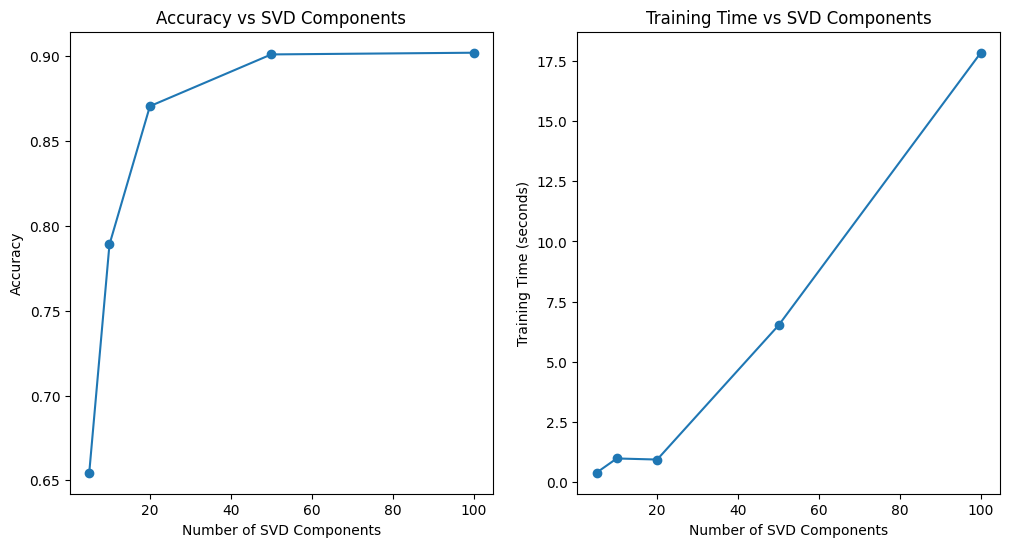

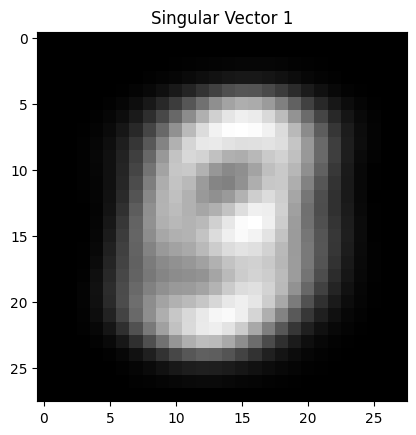

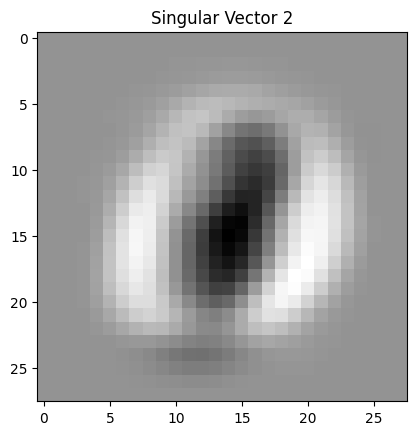

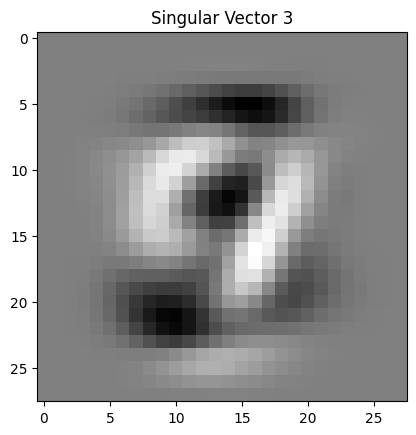

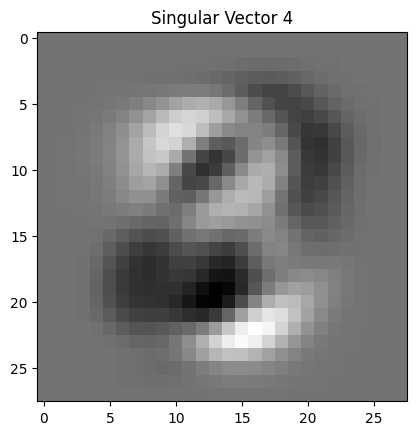

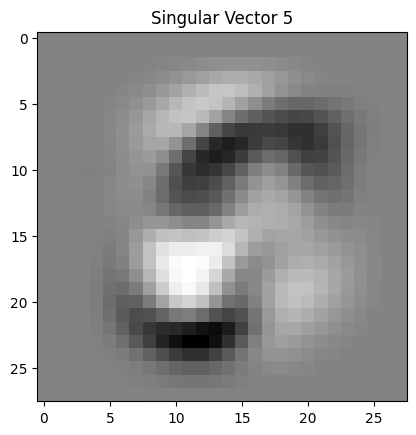

In [10]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization

components, accuracies, times = zip(*results)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='o')
plt.title('Accuracy vs SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(components, times, marker='o')
plt.title('Training Time vs SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')

plt.show()

_, _, Vt_train = np.linalg.svd(X_train, full_matrices=False)

for i in range(5):
    plt.imshow(Vt_train[i].reshape(28, 28), cmap='gray')
    plt.title(f'Singular Vector {i+1}')
    plt.show()



## Part 6: Analyze / Conclusion

YOUR ANSWER:

For the SVD components, I used 100, 50, 20, 10, 5. The results show that as the number of SVD components increases, the accuracy improves. The highest accuracy of 90.2% was achieved using 100 components. However, the optimal balance between accuracy and training time is found with 50 components, where the model achieved 90.1% accuracy in 6.5 seconds, making it the most efficient.

The training time grows with more components, but after 50 there were diminishing returns in accuracy. The visualized singular vectors show meaningful patterns. More specifically that the top few vectors contribute the most significant information for classification.

Overall, SVD reduces the dimensionality while keeping important information, with 50 components being the optimal choice for balancing performance and efficiency.